<a href="https://colab.research.google.com/github/Rushabh309/Stock-price-Prediction-using-Time-Series-Forecasting/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock price Prediction**

Import libraries and dependencies.

In [1]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
warnings.filterwarnings('ignore')

**First of all, I loaded the specific TATAGLOBAL dataset. This dataset is composed of eight different features.**

In [3]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
print(df.head())
print(df.shape)
print(df.columns)

         Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0  2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1  2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2  2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3  2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4  2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55

[5 rows x 8 columns]
(2035, 8)
Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


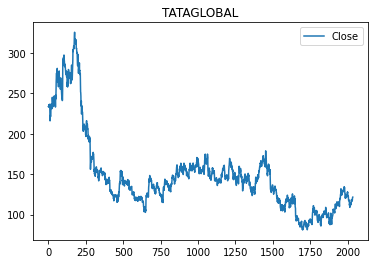

In [21]:
df[['Close']].plot()
plt.title("TATAGLOBAL")
plt.show()

Text(0.5, 1.0, 'TATAGLOBAL Cumulative Returns')

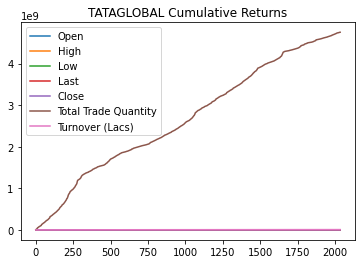

In [6]:
# Cumulative Return
dr = df.cumsum()
dr.plot()
plt.title('TATAGLOBAL Cumulative Returns')

Before starting working on Time Series prediction, I decided to analyse the autocorrelation plot of the “Open” feature with respect to a fixed lag of 5.Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.

The results shown in Figure confirmed the ARIMA would have been a good model to be applied to this type of data.

Text(0.5, 1.0, 'TATAGLOBAL Autocorrelation plot')

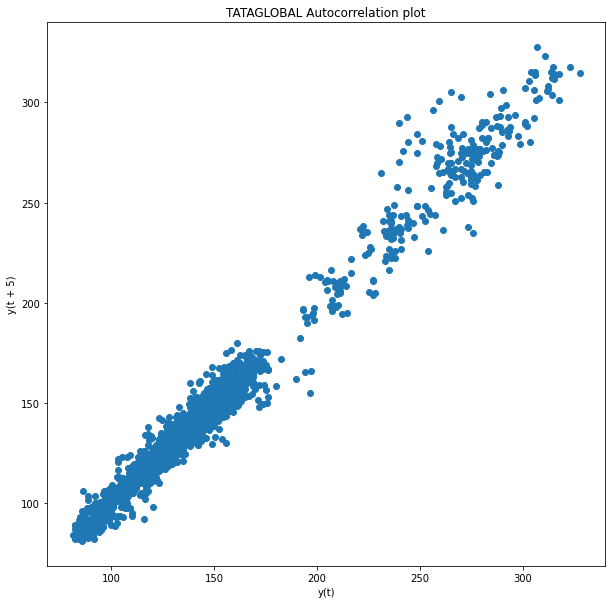

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('TATAGLOBAL Autocorrelation plot')

**ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction**
   
> ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.
The method is suitable for univariate time series with trend and without seasonal components.

There are three important parameters in ARIMA:

p (past values used for forecasting the next value)

q (past forecast errors used to predict the future values)

d (order of differencing)

In this model I am use (p,q,d) is (5,1,0).
Successively, I divided the data into a training and test set. Once done so, I plotted both on the same figure in order to get a feeling of how does Time Series looks like.




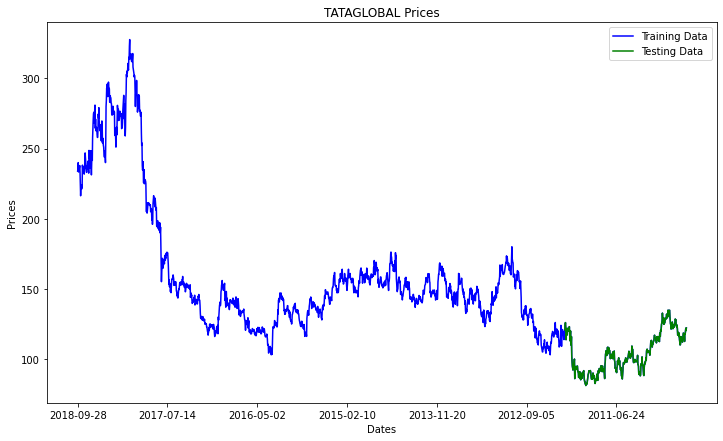

In [16]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('TATAGLOBAL Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

**Order to evaluate the ARIMA model, I decided to use two different error functions: Mean Squared Error (MSE) and Symmetric Mean Absolute Percentage Error (SMAPE). SMAPE is commonly used as an accuracy measure based on relative errors.**
 
**SMAPE is not currently supported in Scikit-learn as a loss function I, therefore, had first to create this function on my own.**

In [9]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [10]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 7.068
Symmetric mean absolute percentage error: 14.897


**Finally, I decided to plot the training, test and predicted prices against time to visualize how did the model performed against the actual prices.**

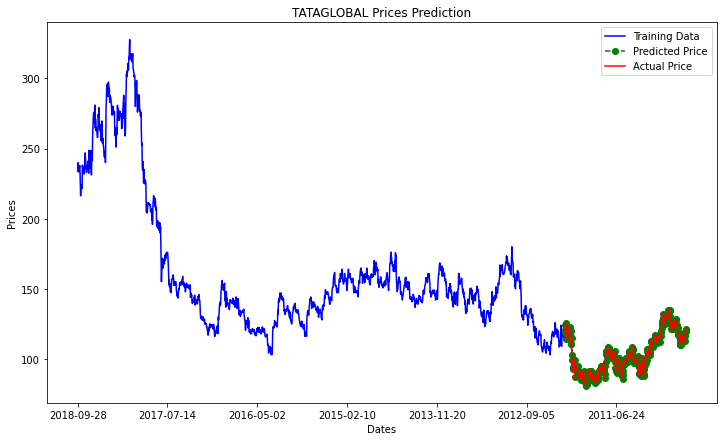

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('TATAGLOBAL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

**Below graph is prediction of test data and in the graph red stands for Actual Price and green stands for Predicted Price**

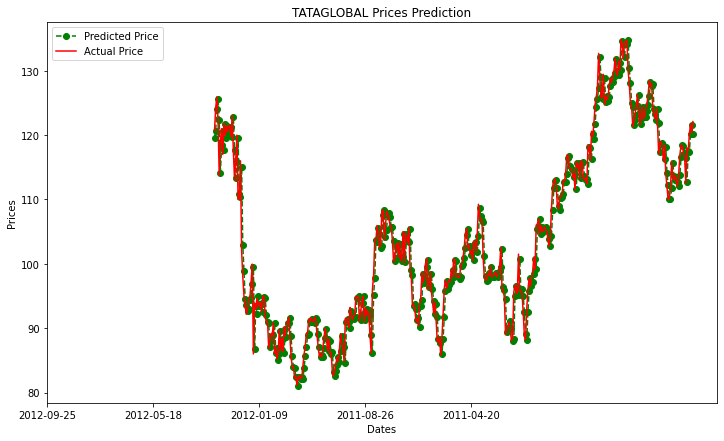

In [20]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1857, 90), df['Date'][1486:1857:90])
plt.title('TATAGLOBAL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()